In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
df = pd.read_csv('contract_yr_perf.csv')
data = df.drop(["player", "tm"], axis=1)
data['%fppg'] = data.apply(lambda r: ((r.fppg2 - r.fppg1)/r.fppg1) * 100, axis = 1)
data

,g1,tgt1,rec1,Ctch1,yds1,td1,fp1,fppg1,CUSH1,SEPR1,...,CUSH2,SEPR2,TAY2,TAYP2,YACR2,xYAC/R2,YACRA2,%CapAPY,Value,%fppg
0,16,132,100,0.758,1054,10,215.4,13.462500,6.2,3.4,...,7.0,3.2,14.9,35.58,4.2,3.9,0.2,0.095,17250000,-4.874652
1,14,92,65,0.707,984,5,160.9,11.492857,6.8,2.4,...,6.8,2.7,13.1,18.07,3.6,2.6,1.0,0.068,12500000,-14.729646
2,12,84,65,0.774,840,7,158.5,13.208333,6.4,3.0,...,6.3,3.3,7.3,16.17,6.3,5.4,0.9,0.088,15983000,4.587652
3,14,82,61,0.744,726,5,133.1,9.507143,6.6,3.1,...,5.7,2.9,15.0,20.21,2.6,2.7,-0.1,0.033,6000000,-16.829452
4,12,89,59,0.663,699,6,135.4,11.283333,6.0,3.1,...,6.4,3.4,6.0,9.94,3.4,3.3,0.1,0.030,5500000,-37.813885
5,16,88,55,0.625,642,5,121.7,7.606250,6.6,3.3,...,5.6,2.7,13.7,16.30,3.2,2.0,1.2,0.030,5500000,-43.116954
6,15,79,51,0.646,742,6,135.7,9.046667,5.7,2.6,...,6.0,2.8,12.0,23.24,4.1,3.1,1.1,0.055,10000000,-10.257001
7,15,74,49,0.662,667,2,103.2,6.880000,6.2,2.8,...,6.4,3.3,8.5,13.99,7.1,4.4,2.7,0.027,5000000,30.813953
8,16,82,48,0.585,896,8,161.6,10.100000,5.2,2.4,...,4.8,2.6,14.5,21.93,2.8,3.1,-0.3,0.060,11000000,-43.960396
9,16,104,47,0.452,523,2,87.8,5.487500,5.3,1.7,...,6.1,2.5,12.4,26.96,4.0,3.5,0.5,0.033,6000000,47.835991


In [51]:
x = data['%fppg']
y = data['Value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(data.corr(method='pearson')) # Pearson's r - look at last row

               g1      tgt1      rec1     Ctch1      yds1       td1       fp1  \
g1       1.000000  0.529410  0.390781 -0.302978  0.503341  0.236596  0.449369   
tgt1     0.529410  1.000000  0.942933  0.117027  0.850197  0.377030  0.821052   
rec1     0.390781  0.942933  1.000000  0.435232  0.883694  0.473078  0.885915   
Ctch1   -0.302978  0.117027  0.435232  1.000000  0.324901  0.313167  0.389710   
yds1     0.503341  0.850197  0.883694  0.324901  1.000000  0.584092  0.957993   
td1      0.236596  0.377030  0.473078  0.313167  0.584092  1.000000  0.772947   
fp1      0.449369  0.821052  0.885915  0.389710  0.957993  0.772947  1.000000   
fppg1   -0.071616  0.610849  0.758186  0.601847  0.771267  0.727400  0.851901   
CUSH1   -0.164053  0.066887  0.182671  0.374439  0.085989 -0.100510  0.057416   
SEPR1   -0.379580  0.002872  0.209995  0.594022  0.011474  0.048852  0.074574   
TAY1     0.259828 -0.253131 -0.402321 -0.553305 -0.106672  0.144033 -0.107950   
TAYP1    0.698727  0.603009 

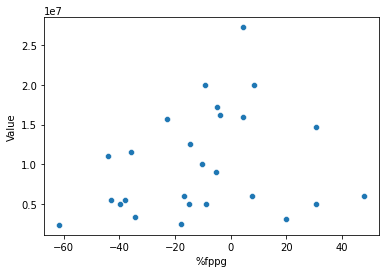

In [2]:
sns.scatterplot(x='%fppg', y='Value', data=data)

In [19]:
# Regression
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
x = x.values.reshape(-1, 1)
regressor.fit(x, y)

RandomForestRegressor()

              player   tm     Value  PredictValue  %ChangeVal
10     Antonio Brown  TAM   3100000     6557580.0  111.534839
12   Rashard Higgins  CLE   2377500     4962890.0  108.744059
20  Emmanuel Sanders  2TM   6000000    11180800.0   86.346667
24     Sammy Watkins  KAN   5000000     9040000.0   80.800000
11       Zach Pascal  IND   3384000     5791740.0   71.150709
25  Breshad Perriman  TAM   2500000     3545000.0   41.800000
7    Kendrick Bourne  SFO   5000000     6910750.0   38.215000
22    Danny Amendola  DET   5000000     6640000.0   32.800000
23      Randall Cobb  DAL   9000000    11717330.0   30.192556
5        Keelan Cole  JAX   5500000     6711455.0   22.026455
6        Tim Patrick  DEN  10000000    11435000.0   14.350000
2       Chris Godwin  TAM  15983000    18189240.0   13.803666
13     Sammy Watkins  KAN   5000000     5540180.0   10.803600
4    Jamison Crowder  NYJ   5500000     6017860.0    9.415636
9         A.J. Green  CIN   6000000     6470750.0    7.845833
19      

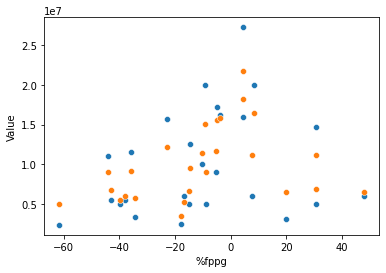

In [36]:
import seaborn as sns
df = pd.read_csv('contract_yr_perf.csv')

y_pred = regressor.predict(x)
frame = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
sns.scatterplot(x='%fppg', y='Value', data=data)
sns.scatterplot(x='%fppg', y=y_pred, data=data)
extract_predicted = frame["Predicted"]

df.insert(1, "PredictValue", extract_predicted)
df['%ChangeVal'] = df.apply(lambda r: ((r.PredictValue - r.Value)/r.Value) * 100, axis = 1)
print(df[['player', 'tm', 'Value', 'PredictValue', '%ChangeVal']].sort_values('%ChangeVal', ascending=False))

In [15]:
# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(data)

all_predictions = model.predict(data)
print(all_predictions)

[1 1 1 0 0 0 1 0 1 0 0 0 0 0 2 2 1 2 1 1 0 1 0 0 0 0]


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
df = pd.read_csv('contract_yr_perf.csv')
data = df.drop(["player", "tm"], axis=1)
data['grade1'] = data.apply(lambda r: (((r.Ctch1 / 100 * r.TAY1 / 100 + r.SEPR1 / r.CUSH1 + (r.YACR1 + r.YACRA1)/10) * r.TAYP1 / 100)), axis = 1)
data['grade2'] = data.apply(lambda r: (((r.Ctch2 / 100 * r.TAY2 / 100 + r.SEPR2 / r.CUSH2 + (r.YACR2 + r.YACRA2)/10) * r.TAYP2 / 100)), axis = 1)
data['%grade'] = data.apply(lambda r: ((r.grade2 - r.grade1)/r.grade1) * 100, axis = 1)
data

,g1,tgt1,rec1,Ctch1,yds1,td1,fp1,fppg1,CUSH1,SEPR1,...,TAY2,TAYP2,YACR2,xYAC/R2,YACRA2,%CapAPY,Value,grade1,grade2,%grade
0,16,132,100,0.758,1054,10,215.4,13.462500,6.2,3.4,...,14.9,35.58,4.2,3.9,0.2,0.095,17250000,0.240079,0.355253,47.973157
1,14,92,65,0.707,984,5,160.9,11.492857,6.8,2.4,...,13.1,18.07,3.6,2.6,1.0,0.068,12500000,0.246239,0.168600,-31.529898
2,12,84,65,0.774,840,7,158.5,13.208333,6.4,3.0,...,7.3,16.17,6.3,5.4,0.9,0.088,15983000,0.149766,0.210213,40.361254
3,14,82,61,0.744,726,5,133.1,9.507143,6.6,3.1,...,15.0,20.21,2.6,2.7,-0.1,0.033,6000000,0.169293,0.170931,0.967180
4,12,89,59,0.663,699,6,135.4,11.283333,6.0,3.1,...,6.0,9.94,3.4,3.3,0.1,0.030,5500000,0.199544,0.091890,-53.949886
5,16,88,55,0.625,642,5,121.7,7.606250,6.6,3.3,...,13.7,16.30,3.2,2.0,1.2,0.030,5500000,0.185535,0.162591,-12.366414
6,15,79,51,0.646,742,6,135.7,9.046667,5.7,2.6,...,12.0,23.24,4.1,3.1,1.1,0.055,10000000,0.208055,0.246592,18.522551
7,15,74,49,0.662,667,2,103.2,6.880000,6.2,2.8,...,8.5,13.99,7.1,4.4,2.7,0.027,5000000,0.191720,0.218632,14.037342
8,16,82,48,0.585,896,8,161.6,10.100000,5.2,2.4,...,14.5,21.93,2.8,3.1,-0.3,0.060,11000000,0.319375,0.192056,-39.865163
9,16,104,47,0.452,523,2,87.8,5.487500,5.3,1.7,...,12.4,26.96,4.0,3.5,0.5,0.033,6000000,0.167234,0.251536,50.409033


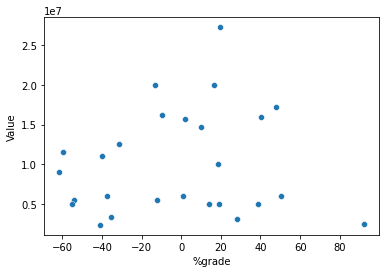

In [48]:
sns.scatterplot(x='%grade', y='Value', data=data)

In [114]:
x1 = data['grade1']
x2 = data['grade2']
y1 = data['Value']
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.25, random_state=0)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.25, random_state=0)
print(data.corr(method='pearson')) # Pearson's r - look at last row

               g1      tgt1      rec1     Ctch1      yds1       td1       fp1  \
g1       1.000000  0.529410  0.390781 -0.302978  0.503341  0.236596  0.449369   
tgt1     0.529410  1.000000  0.942933  0.117027  0.850197  0.377030  0.821052   
rec1     0.390781  0.942933  1.000000  0.435232  0.883694  0.473078  0.885915   
Ctch1   -0.302978  0.117027  0.435232  1.000000  0.324901  0.313167  0.389710   
yds1     0.503341  0.850197  0.883694  0.324901  1.000000  0.584092  0.957993   
td1      0.236596  0.377030  0.473078  0.313167  0.584092  1.000000  0.772947   
fp1      0.449369  0.821052  0.885915  0.389710  0.957993  0.772947  1.000000   
fppg1   -0.071616  0.610849  0.758186  0.601847  0.771267  0.727400  0.851901   
CUSH1   -0.164053  0.066887  0.182671  0.374439  0.085989 -0.100510  0.057416   
SEPR1   -0.379580  0.002872  0.209995  0.594022  0.011474  0.048852  0.074574   
TAY1     0.259828 -0.253131 -0.402321 -0.553305 -0.106672  0.144033 -0.107950   
TAYP1    0.698727  0.603009 

In [133]:
# Regression
from sklearn.ensemble import RandomForestRegressor

regressor1 = RandomForestRegressor()
#x1 = x1.values.reshape(-1, 1)
regressor1.fit(x1, y)

regressor2 = RandomForestRegressor()
#x2 = x2.values.reshape(-1, 1)
regressor2.fit(x2, y)

RandomForestRegressor()

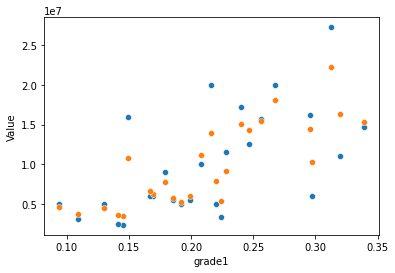

In [148]:
import seaborn as sns
df = pd.read_csv('contract_yr_perf.csv')

y1_pred = regressor1.predict(x1)
frame1 = pd.DataFrame({'Actual': y, 'Predicted1': y1_pred})
sns.scatterplot(x='grade1', y='Value', data=data)
sns.scatterplot(x='grade1', y=y_pred, data=data)

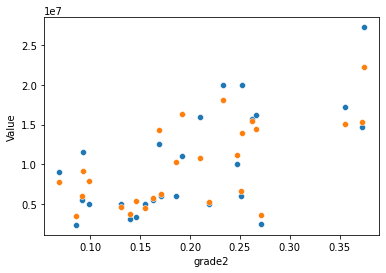

In [149]:
y2_pred = regressor2.predict(x2)
frame2 = pd.DataFrame({'Actual': y, 'Predicted2': y2_pred})
sns.scatterplot(x='grade2', y='Value', data=data)
sns.scatterplot(x='grade2', y=y_pred, data=data)

In [150]:
extract_predicted1 = frame1["Predicted1"]
extract_predicted2 = frame2["Predicted2"]
change_grade = data['%grade']
old_grade = data['grade1']
new_grade = data['grade2']

df.insert(1, "EstValPreContract", extract_predicted1)
df.insert(2, "EstValPostContract", extract_predicted2)
df.insert(3, "OldGrade", old_grade)
df.insert(4, "NewGrade", new_grade)
df['%ChangePreVal'] = df.apply(lambda r: ((r.EstValPreContract - r.Value)/r.Value) * 100, axis = 1)
df['%ChangePostVal'] = df.apply(lambda r: ((r.EstValPostContract - r.Value)/r.Value) * 100, axis = 1)
print(df[['player', 'tm', 'Value', 'EstValPreContract', 'EstValPostContract', '%ChangePreVal', '%ChangePostVal', 'OldGrade', 'NewGrade']].sort_values('Value', ascending=False))

              player   tm     Value  EstValPreContract  EstValPostContract  \
14   DeAndre Hopkins  HOU  27250000         20122500.0          23020000.0   
15      Keenan Allen  LAC  20025000         18507000.0          14474750.0   
17      Amari Cooper  DAL  20000000         15951520.0          15580000.0   
0      Tyler Lockett  SEA  17250000         15461340.0          16795000.0   
19      Robert Woods  LAR  16250000         14500250.0          14912500.0   
2       Chris Godwin  TAM  15983000         11552955.0          12499540.0   
18       Cooper Kupp  LAR  15750000         15174000.0          14687500.0   
16    Robby Anderson  NYJ  14750000         14177500.0          17395000.0   
1        Corey Davis  TEN  12500000         13792500.0           9720000.0   
21  Larry Fitzgerald  ARI  11500000         10132780.0           8650100.0   
8     Nelson Agholor  LVR  11000000         14365000.0          10248810.0   
6        Tim Patrick  DEN  10000000         12107680.0          